<a href="https://colab.research.google.com/github/sren97/Modelos2_PhiUSIIL/blob/main/Proyecto_Modelos_2_PhiUSIIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Descarga de la base de datos


In [1]:
%pip install ucimlrepo matplotlib pandas scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
data = phiusiil_phishing_url_website.data.original
features = phiusiil_phishing_url_website.data.features
target = phiusiil_phishing_url_website.data.targets



# 1. Descripción del problema


## A. Contexto y utilidad del problema


La detección de sitios _phishing_ es un problema crítico, y que cada vez ha ganado más relevancia dentro del ámbito de la seguridad informática, ya que millones de usuarios son víctimas cada año de páginas falsas que suplantan sitios legítimos, resultando en pérdidas financieras, el robo de información sensible y la pérdida de la confianza en las instituaciones que manejan estos datos.

El conjunto PhiUSIIL Phishing URL Dataset fue creado con el propósito de ofrecer una base estandarizada para entrenar y evaluar modelos de detección automática de phishing. Este dataset integra características léxicas, de contenido y de red, lo que permite a los algoritmos aprender patrones que distinguen una URL real de una fraudulenta.

Automatizar este proceso mediante _Machine Learning_ permite reducir el tiempo de respuesta ante amenazas, permitiendo la detección proactiva de ataques desconocidos (_zero-day attacks_) y complementar las soluciones basadas en listas negras, que suelen quedar obsoletas con rapidez frente a la evolución constantey las sofistificación de las tácticas de los atacantes.

Debido a su estructura limpia y su número elevado de registros, el dataset PhiUSIIL se ha convertido en una referencia para estudios de detección de phishing con modelos de _Machine Learning_ y _Deep Learning_.


## B. Caracterización del conjunto de datos


In [3]:
# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
data.info()



{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

In [4]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [5]:
data.select_dtypes(include=['float64', 'int64']).head(25)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
5,30,23,0,100.000000,1.000000,0.079963,0.060614,3,1,0,...,0,0,1,35,1,11,86,0,14,1
6,25,18,0,100.000000,1.000000,0.522907,0.063549,3,1,0,...,0,0,1,32,4,14,44,2,17,1
7,25,18,0,100.000000,1.000000,0.522907,0.060486,3,1,0,...,0,0,1,24,2,22,36,0,15,1
8,29,22,0,100.000000,1.000000,0.005084,0.056980,2,1,0,...,0,0,1,71,4,9,40,1,317,1
9,18,11,0,100.000000,1.000000,0.079963,0.070497,3,1,0,...,0,0,1,10,1,12,173,6,65,1


In [6]:
data.select_dtypes(include=['float64', 'int64']).columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [7]:
data_numerical = data[['URLLength', 'DomainLength',
       'TLDLength','NoOfSubDomain','NoOfObfuscatedChar',
       'NoOfLettersInURL','NoOfDegitsInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'LineOfCode', 'LargestLineLength','NoOfURLRedirect', 'NoOfSelfRedirect',
       'NoOfPopup', 'NoOfiFrame','NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label' ]]

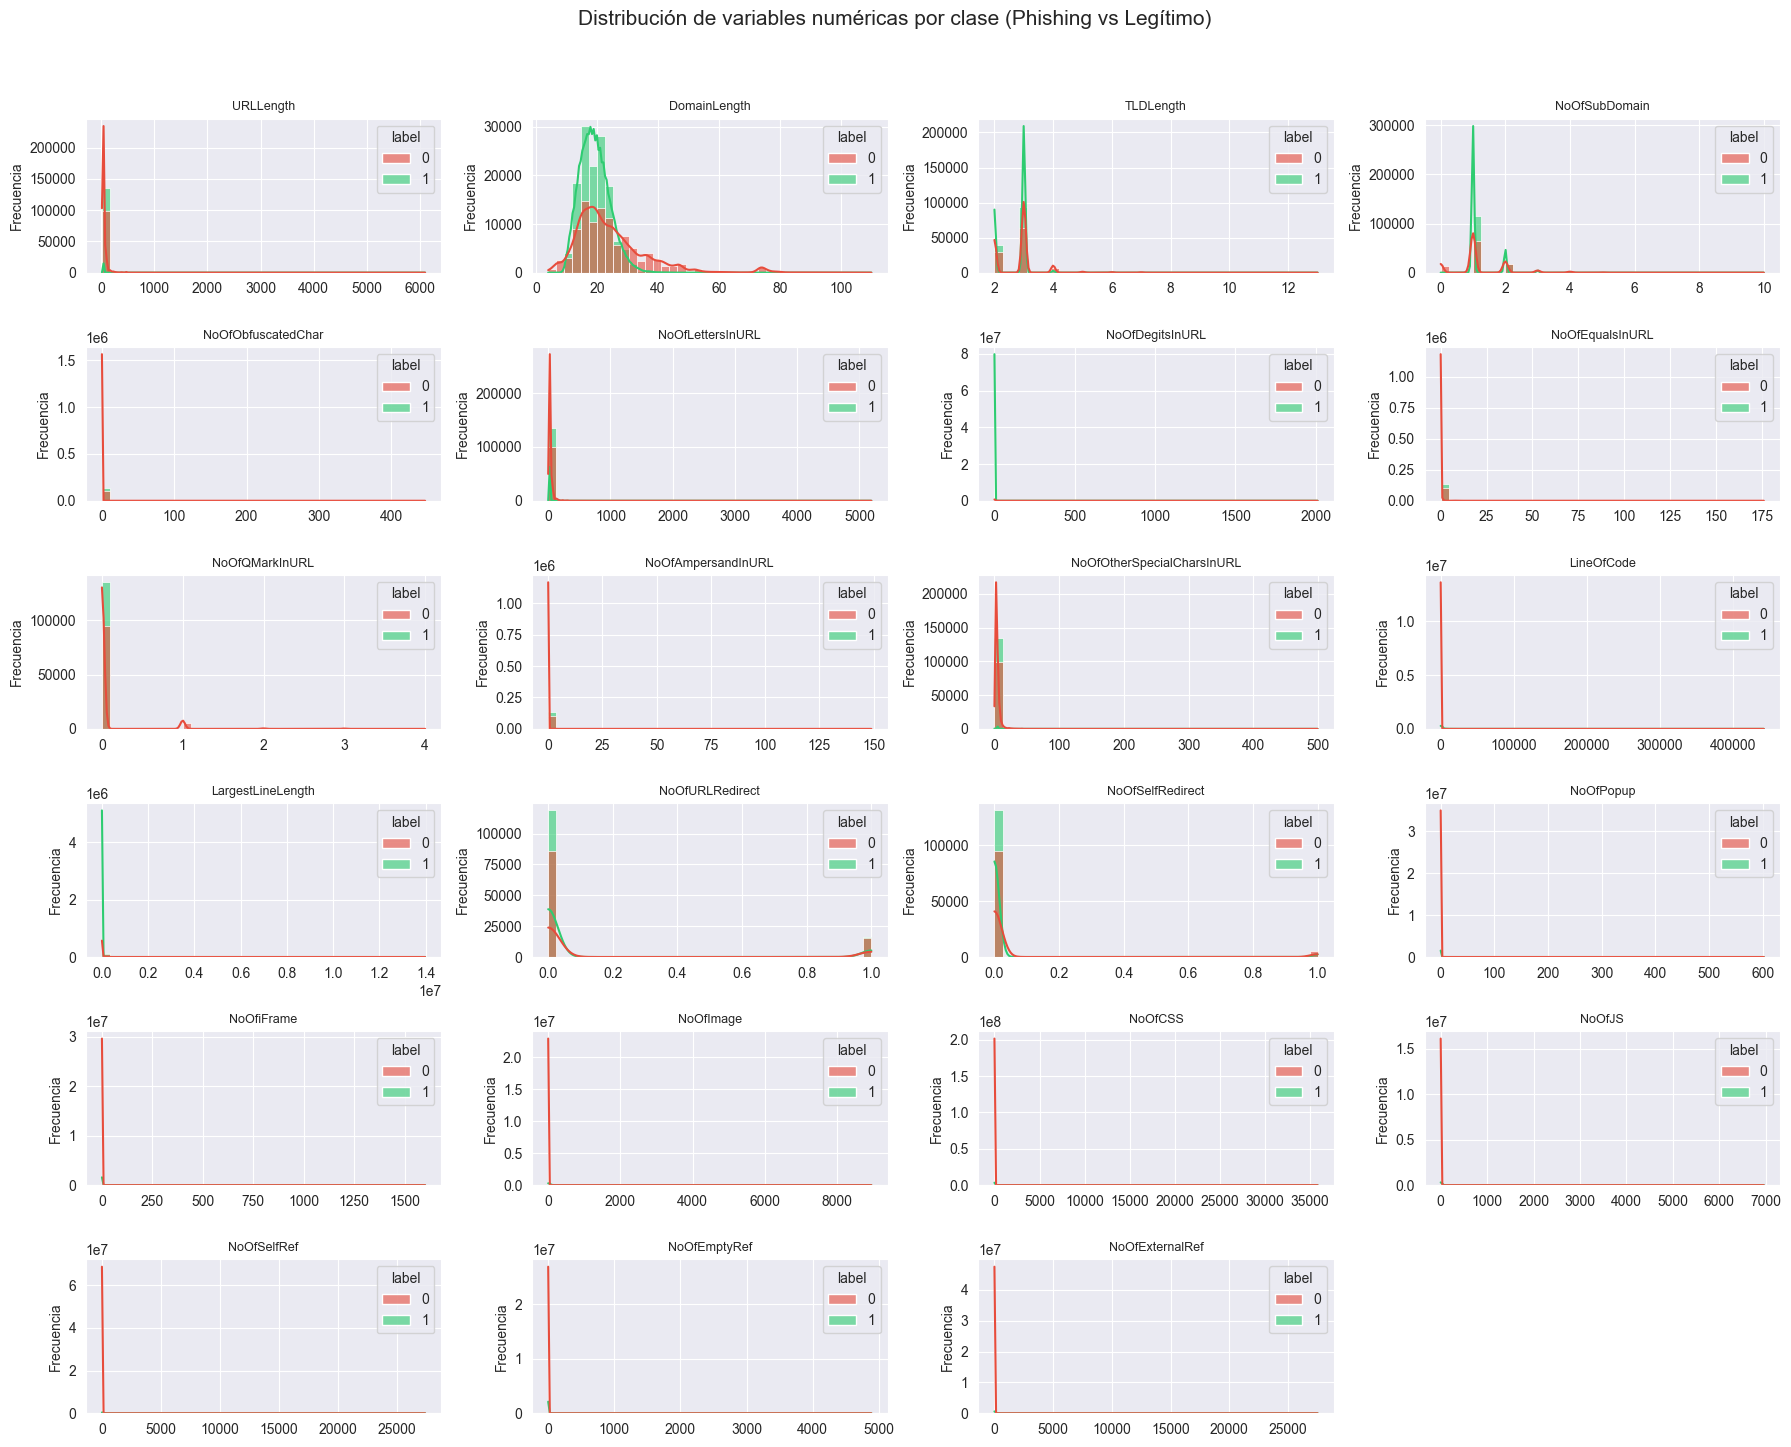

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data_numerical.columns[:-1]  # todas menos 'label'
n_cols = 4
n_rows = (len(num_cols) // n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

i = -1  # Inicializar i para evitar que esté indefinida
for i, col in enumerate(num_cols):
    sns.histplot(data=data_numerical, x=col, hue='label', bins=40, kde=True,
                 palette=['#e74c3c', '#2ecc71'], ax=axes[i], alpha=0.6)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de variables numéricas por clase (Phishing vs Legítimo)', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


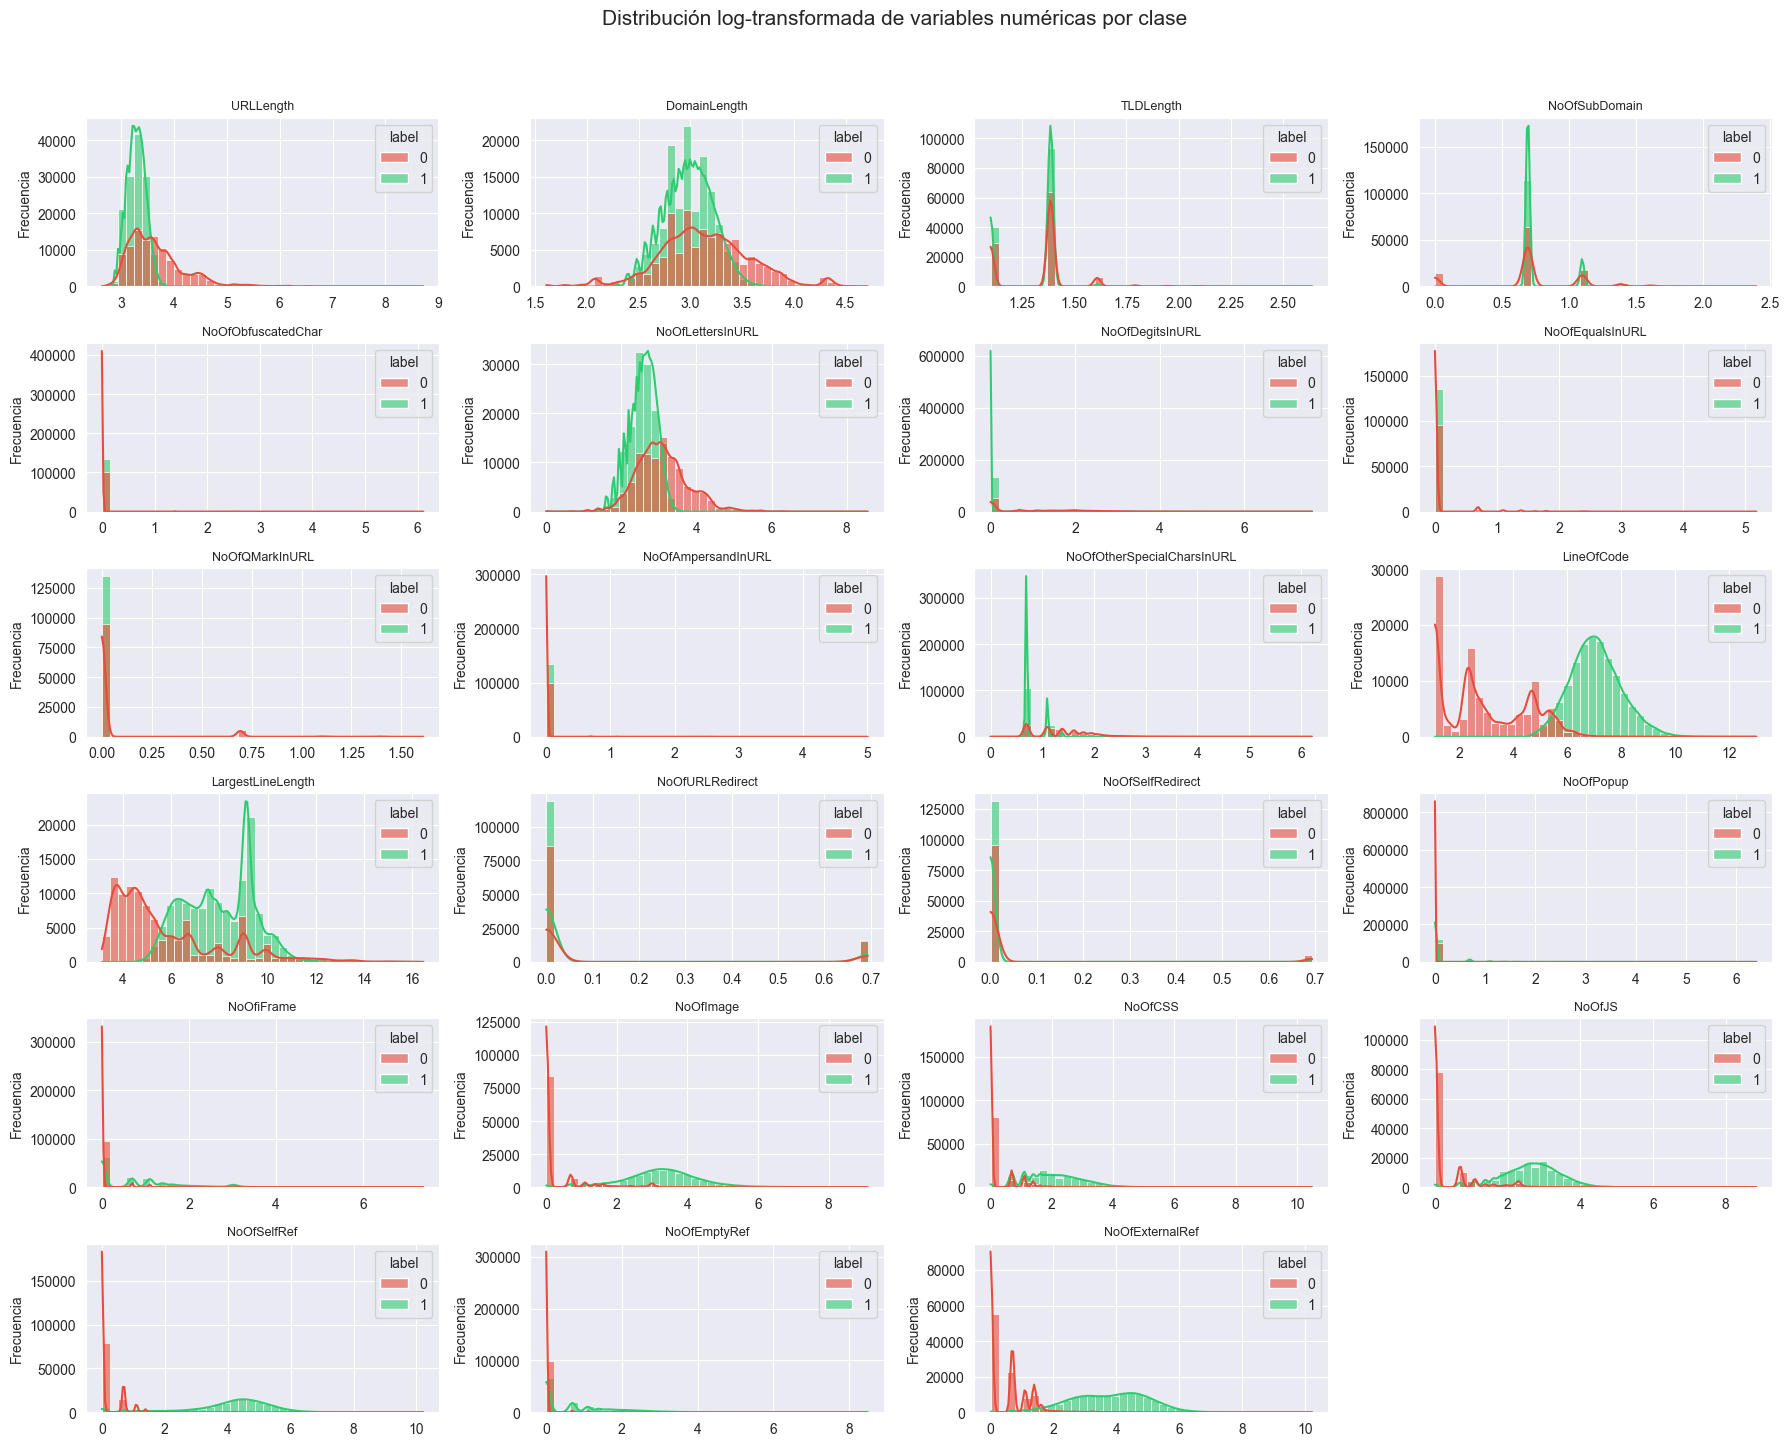

In [9]:
num_cols = data_numerical.columns[:-1]
n_cols = 4
n_rows = (len(num_cols) // n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

i = -1  # Inicializar i para evitar que esté indefinida
for i, col in enumerate(num_cols):
    col_data = np.log1p(data_numerical[col])  # log(1+x) evita -inf
    sns.histplot(x=col_data, hue=data_numerical['label'], bins=40, kde=True,
                 palette=['#e74c3c', '#2ecc71'], ax=axes[i], alpha=0.6)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución log-transformada de variables numéricas por clase', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


### Inspección de variables categóricas


In [10]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [11]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head(25)


,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina
5,23107.txt,https://www.globalreporting.org,www.globalreporting.org,org,gri - home
6,23034.txt,https://www.saffronart.com,www.saffronart.com,com,0
7,696732.txt,https://www.nerdscandy.com,www.nerdscandy.com,com,nerds candy
8,739255.txt,https://www.hyderabadonline.in,www.hyderabadonline.in,in,hyderabadonline - business listing in hyderaba...
9,14486.txt,https://www.aap.org,www.aap.org,org,home


### Distribución de clases


In [12]:
target.value_counts()



label
1        134850
0        100945
Name: count, dtype: int64

In [13]:
target.value_counts(normalize=True)

label
1        0.571895
0        0.428105
Name: proportion, dtype: float64

## C. Análisis conjunto de datos


El conjunto PhiUSIIL Phishing URL Datasetcontiene 235,795 registros, de los cuales cada uno representa una URL etiquetada como:

- 1:Sitio legítimo

- 0:Sitio de phishing

Cada registro incluye 55 atributos que describen propiedades de la URL y de la página web asociada con su respectiva etiqueta, de estos, 51 son de tipo númerico, y 4 de tipo categórico (FILENAME, URL, TLD y Title). Entre las categorías de características más relevantes se encuentran:

**Características léxicas:** longitud de la URL (URLLength), número de subdominios (NoOfSubDomain), presencia de caracteres sospechosos como “@”, “//”, “-” (NoOfOtherSpecialCharsInURL).

**Características basadas en contenido HTML:** Número total de líneas de código (LineOfCode), la existencia de un título (HasTitle) y su relación con el dominio o la URL (DomainTitleMatchScore, URLTitleMatchScore); la presencia de etiquetas visuales o de contenido como imágenes (NoOfImage), hojas de estilo (NoOfCSS) y scripts (NoOfJS).

**Características derivadas del dominio:** La detección de una dirección IP en lugar de un nombre de dominio (IsDomainIP), TLD y TLDLenght, y TLDLegitimateProb que evalúa la parte final de las URL (.gov, .com, .net), presencia de HTTPS (IsHTTPS) para validar si le sitio posee un certificado.

El dataset fue recopilado a partir de múltiples fuentes y validado manualmente. el análisis exploratorio evidenció que las distribuciones tienen una alta asimetría, con muchos valores concentrados en el valor de 0 y presencia de valores extremos, por lo que para algunas técnicas se tendría que aplicar transformaciones logarítmicas o algún otro método de escalado, además no contiene valores faltantes y está balanceado entre clases con 57% legítimas vs 43% phishing.

Esta estructura lo hace adecuado para evaluar distintos algoritmos dentro del paradigma de aprendizaje supervisado. Los modelos basados en árboles, como Random Forest, XGBoost y LightGBM, pueden entrenarse directamente sobre las variables originales, mientras que modelos sensibles a la escala, como SVM, Logistic Regression y redes neuronales profundas, requieren previamente un proceso de normalización o escalado.


## D. Paradigma de aprendizaje y justificación


El proyecto se enmarca en el aprendizaje supervisado con una tarea de clasificación binaria, cuyo objetivo es distinguir entre URLs legítimas y maliciosas (phishing).

Dado que cada muestra cuenta con una etiqueta previamente asignada (0 o 1), los modelos pueden aprender patrones discriminativos a partir de los atributos descritos.

Las métricas empleadas para la evaluación del rendimiento incluirán:

- Accuracy
- Precision
- Recall
- F1-score

La métrica F1-score será especialmente importante para reducir los falsos negativos, es decir, los casos en los que un sitio de phishing se clasifica erróneamente como legítimo, con el uso de este dataset se permitirá comparar diversos modelos de aprendizaje automático con técnicas de optimización y validación cruzada, asegurando una evaluación rigurosa, reproducible y aplicable a contextos reales de ciberseguridad.


# 2. Estado del arte


## A. _Vajrobol et al._

Dado que la base de datos PhiUSIIL contiene ejemplos previamente etiquetados como URLs legíti-
mas y URLs maliciosas, los diferentes trabajos abordados se enmarcan bajo el paradigma de apren-
dizaje supervisado, en donde el modelo aprende a distinguir entre las clases a partir de las etiquetas
proporcionadas. Para ello, se utiliza la técnica de regresión logística en conjunción con selección de
características basada en información mutua. Los autores resaltan que la combinación de estas técnicas
hacen al modelo simple y eficiente, facilitando su interpretabilidad y manteniendo un equilibrio entre
precisión y simplicidad. Como metodología de validación, se particionó el conjunto de datos a un ratio
de 80:20. El desempeño del modelo fue evaluado mediante las métricas de Accuracy, Precision, Recall
y F1-score, y se complementó con matrices de confusión. En la conclusión, lograron una accuracy del
99.97 % alcanzando esos resultados sólo con 5 características: ”URLSimilarityIn- dex,” ”LineOfCode,”
”NoOfExternalRef,” ”NoOfImage,” y ”NoOfSel- fRef.”. Con ello, concluyeron que la técnica de selec-
ción de características Mutual Information, en conjunto con la regresión logística, puede ser un modelo
muy útil, confiable, preciso y fácil de entender para tareas de identificación de URLs maliciosas.


## B. _Sruthi K. & Manohar Naik S._

Este estudio también emplea un enfoque supervisado, por las mismas razones descritas anterior-
mente, dado que se usó el mismo conjunto de datos. En este caso, se utiliza una red neuronal siamesa
con subredes LSTM. Esta red neuronal procesa pares de URLs que, a través de cada subred LSTM,
generan una representación que se compara posteriormente mediante una medida de distancia eucli-
diana, con el fin de determinar la similitud entre ellas. De este modo, el modelo aprende a reducir
la distancia entre pares similares y a aumentarla entre pares disimilares. Se empleó la metodología
de validación cruzada 5-fold cross-validation, la cual fue complementada con estudios de ablación y
sensibilidad para medir la estabilidad del modelo. El desempeño del modelo fue evaluado mediante las
métricas de Accuracy, Precision, Recall y F1-score. En los conjuntos estándar, se obtuvo una accuracy
del 99.68 %, y además, el modelo demostró tener un desempeño similar para muestras generadas usan-
do GPT 4.0, lo que sugiere que podría ser una herramienta efectiva para mitigar los ciberataques de
phishing basados en IA.


## C. _Manguli et al._

Para este trabajo, se utilizaron los conjuntos de datos PhishTank para la obtención de URLs mali-
ciosas y de Alexa para la obtención de URLs legítimas, lo que, por ende, lo clasifica como un problema
de aprendizaje supervisado. La metodología empleada es una Graph Neural Network, específicamente el
algoritmo GraphSAGE, que tiene la capacidad de generalizar a nuevos nodos o grafos no vistos durante
el entrenamiento. Se empleó la metodología de validación cruzada 5-fold cross-validation. Asimismo, se
evaluó el desempeño mediante las métricas de Accuracy, Precision, Recall, F1-score y AUC-ROC. El
modelo GraPhish obtuvo una accuracy del 98.96 %, por lo que resultó ser una gran alternativa cuando
se busca reducir la dependencia en el contenido del mensaje.


## D. _Fatma Hendaoui & Saloua Hendaoui_

Propusieron un sistema denominado SENTINEY, que combina enfoques de aprendizaje supervisado
y no supervisado. Para el aprendizaje no supervisado se implementaron técnicas como Isolation Forest,
One-Class SVM, Elliptic Envelope, K-Means, DBSCAN, Agglomerative Clustering, Birch y GMM ;
mientras que para el aprendizaje supervisado se emplearon MLP, Random Forest y Gradient Boosting.
Dado el diseño del sistema basado en SMPC, no se realizó una validación estadística formal, sino
pruebas en entornos controlados y distribuidos. Las métricas utilizadas fueron Accuracy, Precision,
Recall, F1-score, Average Detection Time y Silhouette Score. El sistema alcanzó una accuracy del
99.4 % y un tiempo promedio de detección de 0.89 segundos por correo, concluyendo que el módulo
supervisado fue más eficaz en la detección de correos de phishing conocidos, mientras que el módulo
no supervisado resultó más eficiente para identificar zero-day attacks.


# 3. Entrenamiento y Evaluación de los Modelos


## 3.1. Configuración Experimental


In [14]:
df_clean = data_numerical.drop_duplicates()

y = df_clean['label']
X = df_clean.drop('label', axis=1)

# 3. Hacer el split sobre el dataframe limpio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("\n--- Desempeño del Mejor Modelo ---")
    print(f"Accuracy:   {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision:  {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:     {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score:   {f1_score(y_test, y_pred):.4f}")



### 3.1.1. Regresión Logística


In [ ]:
# ====================================================
# ===================  SVC  ==========================
# ====================================================
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --------------------------
# Hiperparámetros
# --------------------------
svc_params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'tol': [1e-3, 1e-4]
}

svc_model = SVC(random_state=42)

svc_search = GridSearchCV(
    svc_model,
    svc_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)

print("Entrenando SVC (esto puede tomar varios minutos)...")
svc_search.fit(X_train, y_train)
print("Mejor modelo SVC:", svc_search.best_estimator_)
print("Mejores parámetros:", svc_search.best_params_)

# ---------------------------------------------
# Errores Train / Validación (CV) / Prueba
# ---------------------------------------------
y_train_pred = svc_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

val_accuracy = svc_search.best_score_
val_error = 1 - val_accuracy

cv_results = pd.DataFrame(svc_search.cv_results_)
best_idx = svc_search.best_index_
val_error_std = cv_results.loc[best_idx, 'std_test_score']

y_pred_svc = svc_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svc)
test_error = 1 - test_accuracy

print("\n=== Errores SVC ===")
print(f"Error de Entrenamiento: {train_error:.6f}")
print(f"Error de Validación:    {val_error:.6f} ± {val_error_std:.6f}")
print(f"Error de Prueba:        {test_error:.6f}")

# ---------------------------------------------
# Gráfico 1: Train vs Validación vs Prueba
# ---------------------------------------------
plt.figure(figsize=(8, 5))
errors = [train_error, val_error, test_error]
labels = ["Entrenamiento", "Validación\n(CV)", "Prueba"]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = plt.bar(labels, errors, color=colors, alpha=0.7, edgecolor='black')
plt.errorbar(1, val_error, yerr=val_error_std,
             fmt='none', capsize=8, capthick=2, color='black')
for i, (bar, err) in enumerate(zip(bars, errors)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{err:.6f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title("SVC – Comparación de Errores", fontsize=14, fontweight='bold')
plt.ylabel("Error", fontsize=12)
plt.ylim(0, max(errors) * 1.3)
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 2: Distribución CV por fold (ERRORES en lugar de accuracy)
# ---------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    svc_search.best_estimator_,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)
cv_errors = 1 - cv_scores
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(cv_errors))
plt.plot(x_pos, cv_errors, 'o-', linewidth=2, markersize=10,
         color='#3498db', markeredgecolor='black', markeredgewidth=2, label='Error por Fold')
mean_error = cv_errors.mean()
plt.axhline(y=mean_error, color='red', linestyle='--',
            linewidth=2, label=f'Media: {mean_error:.6f}')
std_error = cv_errors.std()
plt.fill_between(x_pos, mean_error - std_error, mean_error + std_error,
                 alpha=0.2, color='orange', label=f'±1 std ({std_error:.6f})')
for i, err in enumerate(cv_errors):
    plt.text(i, err + std_error * 0.3, f'{err:.6f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Fold", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("SVC – Error por Fold (CV)", fontsize=14, fontweight='bold')
plt.xticks(x_pos, [f'Fold {i+1}' for i in range(len(cv_errors))])
plt.legend(loc='best')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 3: Información sobre vectores de soporte
# ---------------------------------------------
best_svc = svc_search.best_estimator_
n_support = best_svc.n_support_
support_vectors = best_svc.support_vectors_

# Gráfico de barras mostrando cantidad de vectores de soporte por clase
plt.figure(figsize=(8, 6))
classes = [f'Clase {i}' for i in range(len(n_support))]
colors_sv = ['#3498db', '#e74c3c'][:len(n_support)]
bars = plt.bar(classes, n_support, color=colors_sv, alpha=0.7, edgecolor='black')

# Agregar valores en las barras
for bar, val in zip(bars, n_support):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel("Cantidad", fontsize=12)
plt.title("SVC – Vectores de Soporte por Clase", fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.4, linestyle='--')

# Agregar línea con el total
total_sv = sum(n_support)
plt.axhline(y=total_sv, color='red', linestyle='--', linewidth=2,
            label=f'Total: {total_sv}', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------
# Métricas adicionales
# ---------------------------------------------
print("\n=== Métricas Adicionales ===")
print(f"Accuracy de Entrenamiento: {train_accuracy:.6f} ({train_accuracy*100:.4f}%)")
print(f"Accuracy de Validación:    {val_accuracy:.6f} ({val_accuracy*100:.4f}%)")
print(f"Accuracy de Prueba:        {test_accuracy:.6f} ({test_accuracy*100:.4f}%)")
print(f"\nKernel utilizado: {best_svc.kernel}")
print(f"Número total de vectores de soporte: {len(support_vectors)}")
print(f"Vectores de soporte por clase: {n_support}")
print(f"Porcentaje de vectores de soporte: {len(support_vectors)/len(X_train)*100:.2f}%")


## 3.1.2. Decision Tree

Mejor modelo Árbol: DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)
Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}

=== Errores Árbol ===
Error de Entrenamiento: 0.0023 ± 0.0001
Error de Validación:   0.0023 ± 0.0001
Error de Prueba:        0.0020


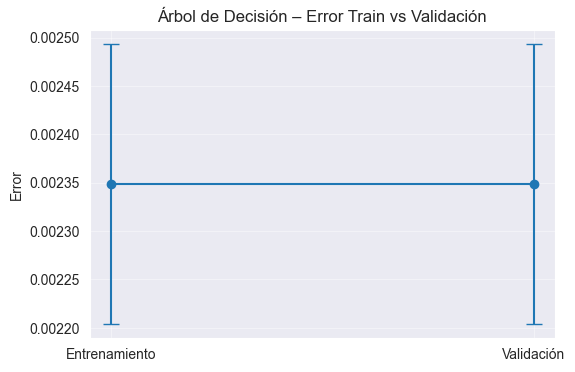

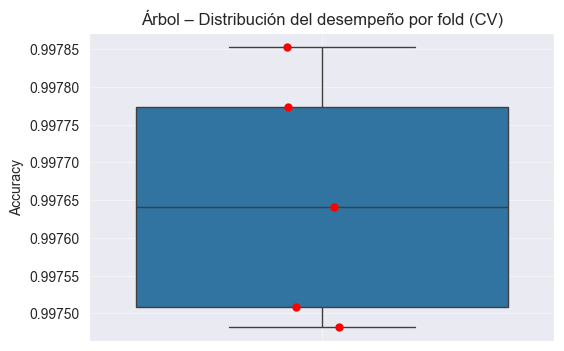

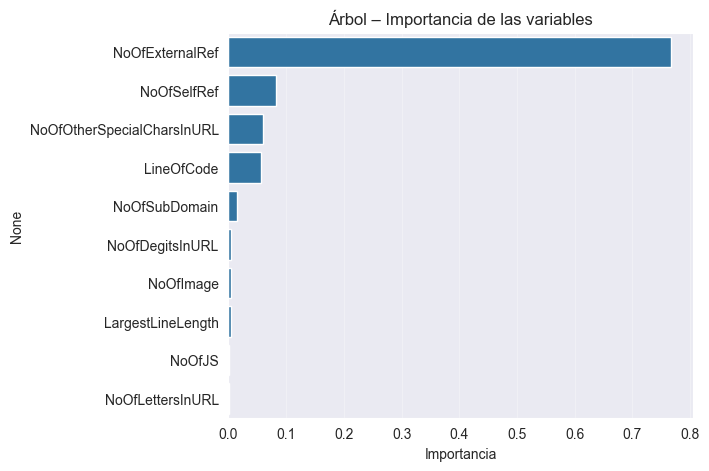

In [19]:
# ====================================================
# ===============  ÁRBOL DE DECISIÓN  =================
# ====================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --------------------------
# Hiperparámetros
# --------------------------
tree_params = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

tree_model = DecisionTreeClassifier(random_state=42)

tree_search = GridSearchCV(
    tree_model,
    tree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True  # Para obtener scores de entrenamiento
)

tree_search.fit(X_train, y_train)
print("Mejor modelo Árbol:", tree_search.best_estimator_)
print("Mejores parámetros:", tree_search.best_params_)

# ---------------------------------------------
# Errores Train / Validación (CV) / Prueba
# ---------------------------------------------
# Error de ENTRENAMIENTO: predicción sobre todo el conjunto de entrenamiento
y_train_pred = tree_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Error de VALIDACIÓN: del mejor modelo en GridSearchCV
val_accuracy = tree_search.best_score_
val_error = 1 - val_accuracy

# Obtener la desviación estándar del CV (del mejor modelo)
cv_results = pd.DataFrame(tree_search.cv_results_)
best_idx = tree_search.best_index_
val_error_std = cv_results.loc[best_idx, 'std_test_score']

# Error de PRUEBA: predicción sobre conjunto de prueba
y_pred_tree = tree_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_tree)
test_error = 1 - test_accuracy

print("\n=== Errores Árbol ===")
print(f"Error de Entrenamiento: {train_error:.6f}")
print(f"Error de Validación:    {val_error:.6f} ± {val_error_std:.6f}")
print(f"Error de Prueba:        {test_error:.6f}")

# Detectar posible overfitting/underfitting
if train_error < val_error * 0.5:
    print("\n⚠️  ALERTA: Posible OVERFITTING (error train << error validación)")
elif abs(train_error - val_error) < 0.001 and train_error > 0.05:
    print("\n⚠️  ALERTA: Posible UNDERFITTING (ambos errores altos y similares)")
else:
    print("\n✓ Modelo con buen balance bias-variance")

# ---------------------------------------------
# Gráfico 1: Train vs Validación vs Prueba
# ---------------------------------------------
plt.figure(figsize=(8, 5))
errors = [train_error, val_error, test_error]
labels = ["Entrenamiento", "Validación\n(CV)", "Prueba"]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = plt.bar(labels, errors, color=colors, alpha=0.7, edgecolor='black')

# Agregar barra de error solo en validación
plt.errorbar(1, val_error, yerr=val_error_std,
             fmt='none', capsize=8, capthick=2, color='black')

# Etiquetas de valores
for i, (bar, err) in enumerate(zip(bars, errors)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{err:.6f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Árbol de Decisión – Comparación de Errores", fontsize=14, fontweight='bold')
plt.ylabel("Error", fontsize=12)
plt.ylim(0, max(errors) * 1.3)
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 2: Distribución CV por fold (ERRORES en lugar de accuracy)
# ---------------------------------------------
# Obtener scores individuales de cada fold para el mejor modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    tree_search.best_estimator_,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# Convertir a ERRORES para mejor visualización
cv_errors = 1 - cv_scores

plt.figure(figsize=(10, 6))

# Crear gráfico de puntos con líneas
x_pos = np.arange(len(cv_errors))
plt.plot(x_pos, cv_errors, 'o-', linewidth=2, markersize=10,
         color='#3498db', markeredgecolor='black', markeredgewidth=2, label='Error por Fold')

# Línea de media
mean_error = cv_errors.mean()
plt.axhline(y=mean_error, color='red', linestyle='--',
            linewidth=2, label=f'Media: {mean_error:.6f}')

# Banda de ±1 std
std_error = cv_errors.std()
plt.fill_between(x_pos, mean_error - std_error, mean_error + std_error,
                 alpha=0.2, color='orange', label=f'±1 std ({std_error:.6f})')

# Agregar valores en cada punto
for i, err in enumerate(cv_errors):
    plt.text(i, err + std_error * 0.3, f'{err:.6f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Fold", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("Árbol – Error por Fold (CV)", fontsize=14, fontweight='bold')
plt.xticks(x_pos, [f'Fold {i+1}' for i in range(len(cv_errors))])
plt.legend(loc='best')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 3: Importancia de características
# ---------------------------------------------
best_tree = tree_search.best_estimator_
importances = pd.Series(best_tree.feature_importances_, index=X_train.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
colors_importance = plt.cm.viridis(np.linspace(0.3, 0.9, len(top10)))
bars = plt.barh(range(len(top10)), top10.values, color=colors_importance, edgecolor='black')
plt.yticks(range(len(top10)), top10.index)
plt.xlabel("Importancia", fontsize=12)
plt.title("Árbol – Top 10 Variables Más Importantes", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Agregar valores en las barras
for i, (bar, val) in enumerate(zip(bars, top10.values)):
    plt.text(val, i, f' {val:.4f}', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Métricas adicionales
# ---------------------------------------------
print("\n=== Métricas Adicionales ===")
print(f"Accuracy de Entrenamiento: {train_accuracy:.6f} ({train_accuracy*100:.4f}%)")
print(f"Accuracy de Validación:    {val_accuracy:.6f} ({val_accuracy*100:.4f}%)")
print(f"Accuracy de Prueba:        {test_accuracy:.6f} ({test_accuracy*100:.4f}%)")
print(f"\nProfundidad del árbol: {best_tree.get_depth()}")
print(f"Número de hojas: {best_tree.get_n_leaves()}")
print(f"Número de nodos: {best_tree.tree_.node_count}")

## 3.1.5. SVM


Buscando mejor SVM lineal...

Mejor modelo SVM lineal: LinearSVC(C=10, max_iter=5000, random_state=42)
Mejores hiperparámetros: {'C': 10, 'loss': 'squared_hinge', 'tol': 0.0001}

=== Errores SVM Lineal ===
Error de Entrenamiento: 0.0003 ± 0.0001
Error de Validación:   0.0003 ± 0.0001
Error de Prueba:        0.0002


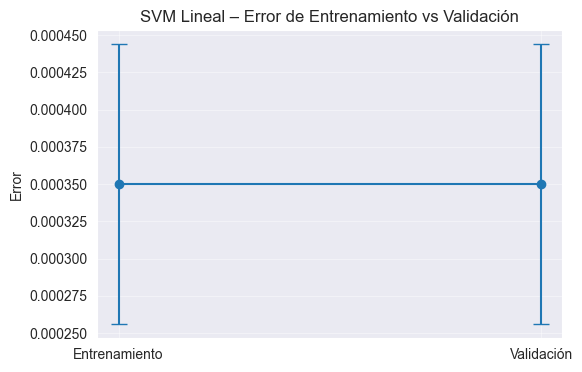

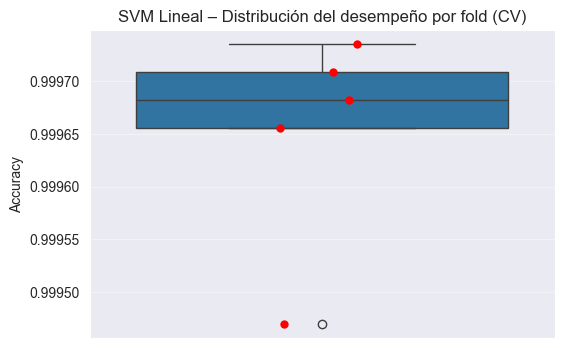

In [20]:
# ====================================================
# ============  REGRESIÓN LOGÍSTICA  =================
# ====================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --------------------------
# Hiperparámetros
# --------------------------
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

logistic_model = LogisticRegression(random_state=42)

logistic_search = GridSearchCV(
    logistic_model,
    logistic_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True
)

logistic_search.fit(X_train, y_train)
print("Mejor modelo Regresión Logística:", logistic_search.best_estimator_)
print("Mejores parámetros:", logistic_search.best_params_)

# ---------------------------------------------
# Errores Train / Validación (CV) / Prueba
# ---------------------------------------------
# Error de ENTRENAMIENTO: predicción sobre todo el conjunto de entrenamiento
y_train_pred = logistic_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Error de VALIDACIÓN: del mejor modelo en GridSearchCV
val_accuracy = logistic_search.best_score_
val_error = 1 - val_accuracy

# Obtener la desviación estándar del CV (del mejor modelo)
cv_results = pd.DataFrame(logistic_search.cv_results_)
best_idx = logistic_search.best_index_
val_error_std = cv_results.loc[best_idx, 'std_test_score']

# Error de PRUEBA: predicción sobre conjunto de prueba
y_pred_logistic = logistic_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_logistic)
test_error = 1 - test_accuracy

print("\n=== Errores Regresión Logística ===")
print(f"Error de Entrenamiento: {train_error:.6f}")
print(f"Error de Validación:    {val_error:.6f} ± {val_error_std:.6f}")
print(f"Error de Prueba:        {test_error:.6f}")

# Detectar posible overfitting/underfitting
if train_error < val_error * 0.5:
    print("\n ALERTA: Posible OVERFITTING (error train << error validación)")
elif abs(train_error - val_error) < 0.001 and train_error > 0.05:
    print("\n ALERTA: Posible UNDERFITTING (ambos errores altos y similares)")
else:
    print("\n Modelo con buen balance bias-variance")

# ---------------------------------------------
# Gráfico 1: Train vs Validación vs Prueba
# ---------------------------------------------
plt.figure(figsize=(8, 5))
errors = [train_error, val_error, test_error]
labels = ["Entrenamiento", "Validación\n(CV)", "Prueba"]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = plt.bar(labels, errors, color=colors, alpha=0.7, edgecolor='black')

# Agregar barra de error solo en validación
plt.errorbar(1, val_error, yerr=val_error_std,
             fmt='none', capsize=8, capthick=2, color='black')

# Etiquetas de valores
for i, (bar, err) in enumerate(zip(bars, errors)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{err:.6f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Regresión Logística – Comparación de Errores", fontsize=14, fontweight='bold')
plt.ylabel("Error", fontsize=12)
plt.ylim(0, max(errors) * 1.3)
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 2: Distribución CV por fold (ERRORES en lugar de accuracy)
# ---------------------------------------------
# Obtener scores individuales de cada fold para el mejor modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    logistic_search.best_estimator_,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# Convertir a ERRORES para mejor visualización
cv_errors = 1 - cv_scores

plt.figure(figsize=(10, 6))

# Crear gráfico de puntos con líneas
x_pos = np.arange(len(cv_errors))
plt.plot(x_pos, cv_errors, 'o-', linewidth=2, markersize=10,
         color='#3498db', markeredgecolor='black', markeredgewidth=2, label='Error por Fold')

# Línea de media
mean_error = cv_errors.mean()
plt.axhline(y=mean_error, color='red', linestyle='--',
            linewidth=2, label=f'Media: {mean_error:.6f}')

# Banda de ±1 std
std_error = cv_errors.std()
plt.fill_between(x_pos, mean_error - std_error, mean_error + std_error,
                 alpha=0.2, color='orange', label=f'±1 std ({std_error:.6f})')

# Agregar valores en cada punto
for i, err in enumerate(cv_errors):
    plt.text(i, err + std_error * 0.3, f'{err:.6f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Fold", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("Regresión Logística – Error por Fold (CV)", fontsize=14, fontweight='bold')
plt.xticks(x_pos, [f'Fold {i+1}' for i in range(len(cv_errors))])
plt.legend(loc='best')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Gráfico 3: Coeficientes (Top 10 más influyentes)
# ---------------------------------------------
best_logistic = logistic_search.best_estimator_
coefficients = pd.Series(best_logistic.coef_[0], index=X_train.columns)
top10 = coefficients.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
# Colores según signo del coeficiente
colors_coef = ['#e74c3c' if coefficients[feat] < 0 else '#2ecc71' for feat in top10.index]
bars = plt.barh(range(len(top10)), [coefficients[feat] for feat in top10.index],
                color=colors_coef, edgecolor='black')
plt.yticks(range(len(top10)), top10.index)
plt.xlabel("Coeficiente", fontsize=12)
plt.title("Regresión Logística – Top 10 Coeficientes", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Agregar valores en las barras
for i, feat in enumerate(top10.index):
    val = coefficients[feat]
    plt.text(val, i, f' {val:.4f}', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Métricas adicionales
# ---------------------------------------------
print("\n=== Métricas Adicionales ===")
print(f"Accuracy de Entrenamiento: {train_accuracy:.6f} ({train_accuracy*100:.4f}%)")
print(f"Accuracy de Validación:    {val_accuracy:.6f} ({val_accuracy*100:.4f}%)")
print(f"Accuracy de Prueba:        {test_accuracy:.6f} ({test_accuracy*100:.4f}%)")
print(f"\nIntercept: {best_logistic.intercept_[0]:.6f}")
print(f"Número de iteraciones: {best_logistic.n_iter_[0]}")

Top 10 variables más correlacionadas con la variable objetivo (label):
NoOfJS                        0.373500
NoOfOtherSpecialCharsInURL    0.358891
NoOfSelfRef                   0.316211
DomainLength                  0.283152
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfLettersInURL              0.258090
URLLength                     0.233445
NoOfiFrame                    0.225822
Name: label, dtype: float64


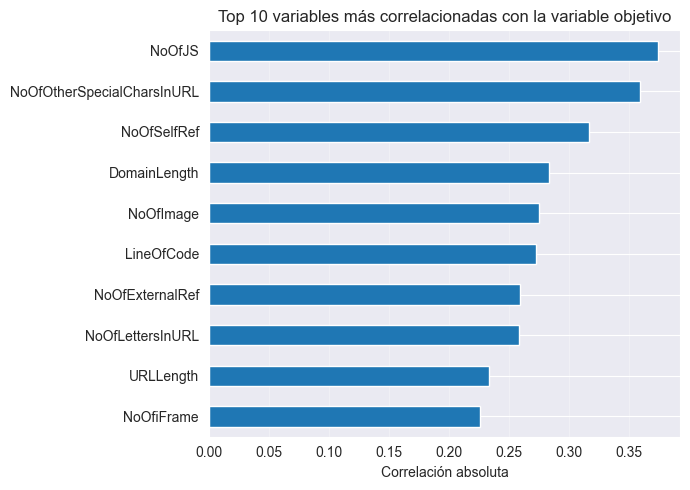

In [21]:
# Matriz de correlación con la variable objetivo y top 10 variables más correlacionadas
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = data_numerical.corr()

# Correlación de cada variable con la variable objetivo 'label'
corr_with_label = corr_matrix['label'].drop('label').abs().sort_values(ascending=False)

# Top 10 variables más correlacionadas
top10_corr = corr_with_label.head(10)
print("Top 10 variables más correlacionadas con la variable objetivo (label):")
print(top10_corr)

# Gráfico de barras
plt.figure(figsize=(7,5))
top10_corr.plot(kind='barh')
plt.title('Top 10 variables más correlacionadas con la variable objetivo')
plt.xlabel('Correlación absoluta')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
